In [ ]:
import os
import cv2
import numpy as np

# Function to load and preprocess the videos
def load_and_preprocess_dataset(dataset_folder, target_size=(224, 224), max_frames=50):
    X = []  # List to store preprocessed video frames
    y = []  # List to store labels (word categories)

    # Iterate through each word folder
    for word_folder in os.listdir(dataset_folder):
        word_path = os.path.join(dataset_folder, word_folder)
        if os.path.isdir(word_path):
            # Iterate through each video file in the word folder
            for video_file in os.listdir(word_path):
                video_path = os.path.join(word_path, video_file)
                # Create a folder to store frames if it doesn't exist
                frames_folder = os.path.join("/kaggle/working/frames", word_folder, video_file.split('.')[0])
                os.makedirs(frames_folder, exist_ok=True)
                
                # Load video using OpenCV
                cap = cv2.VideoCapture(video_path)
                frames = []
                frame_count = 0
                while cap.isOpened():
                    ret, frame = cap.read()
                    if not ret:
                        break
                    # Resize frame to target size and preprocess as needed
                    frame = cv2.resize(frame, target_size)
                    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert to RGB
                    frames.append(frame)
                    
                    # Save frame as an image
                    frame_filename = os.path.join(frames_folder, f"frame_{frame_count}.jpg")
                    cv2.imwrite(frame_filename, frame)
                    
                    frame_count += 1
                    if frame_count == max_frames:
                        break
                cap.release()
                # Pad or truncate frames to ensure fixed length
                if len(frames) < max_frames:
                    frames.extend([frames[-1]] * (max_frames - len(frames)))
                else:
                    frames = frames[:max_frames]
                # Stack frames into a single video tensor
                video_tensor = np.stack(frames)
                X.append(video_tensor)
                y.append(word_folder)  # Assuming folder names are the labels

    X = np.array(X)
    y = np.array(y)
    return X, y

# Define the path to your dataset folder
dataset_folder = "/kaggle/input/signproject-ds/dataset/dataset"

# Load and preprocess the dataset
X, y = load_and_preprocess_dataset(dataset_folder)

print("Dataset loaded.")
print("Shape of input data (videos):", X.shape)
print("Shape of output data (labels):", y.shape)

# Save X and y in the directory /kaggle/working/
np.save("/kaggle/working/X.npy", X)
np.save("/kaggle/working/y.npy", y)


In [ ]:
import os

parent_folder = '/kaggle/working/frames'

# Get the list of items in the parent folder
items = os.listdir(parent_folder)

# Filter out only directories
folders = [item for item in items if os.path.isdir(os.path.join(parent_folder, item))]
print(folders)
# Print the count of folders
print("Number of folders in the parent folder:", len(folders))


In [ ]:
import os
import zipfile

def zip_directory(directory, zip_filename):
    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(directory):
            for file in files:
                file_path = os.path.join(root, file)
                zipf.write(file_path, os.path.relpath(file_path, directory))

# Define the path of the directory to be zipped
directory_to_zip = '/kaggle/working/frames'

# Define the path of the zip file to be created
zip_filename = '/kaggle/working/frames.zip'

# Create a zip file containing the directory and its contents, and delete the files from their original positions
zip_directory(directory_to_zip, zip_filename)

# Output the download link for the zip file
print("Download the frames folder and its contents as a zip file from the following link:")
print(zip_filename)


In [ ]:
import numpy as np

# Load X and y from files
X_loaded = np.load("/kaggle/working/X.npy")
y_loaded = np.load("/kaggle/working/y.npy")

# Print the shapes of X and y
print("Shape of X:", X_loaded.shape)
print("Shape of y:", y_loaded.shape)

# If you want to view specific elements of X or y, you can print them like this:
print("Contents of X:")
print(X_loaded)

print("Contents of y:")
print(y_loaded)

In [1]:
import os
import cv2
import numpy as np

# Function to load and preprocess the videos
def load_and_preprocess_dataset(dataset_folder, target_size=(224, 224), max_frames=50):
    X = []  # List to store preprocessed video frames
    y = []  # List to store labels (word categories)

    # Iterate through each word folder
    for word_folder in os.listdir(dataset_folder):
        word_path = os.path.join(dataset_folder, word_folder)
        if os.path.isdir(word_path):
            # Iterate through each video file in the word folder
            for video_file in os.listdir(word_path):
                video_path = os.path.join(word_path, video_file)
                # Load video using OpenCV
                cap = cv2.VideoCapture(video_path)
                frames = []
                frame_count = 0
                while cap.isOpened():
                    ret, frame = cap.read()
                    if not ret:
                        break
                    # Resize frame to target size and preprocess as needed
                    frame = cv2.resize(frame, target_size)
                    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert to RGB
                    frames.append(frame)
                    frame_count += 1
                    if frame_count == max_frames:
                        break
                cap.release()
                # Pad or truncate frames to ensure fixed length
                if len(frames) < max_frames:
                    frames.extend([frames[-1]] * (max_frames - len(frames)))
                else:
                    frames = frames[:max_frames]
                # Stack frames into a single video tensor
                video_tensor = np.stack(frames)
                X.append(video_tensor)
                y.append(word_folder)  # Assuming folder names are the labels

    X = np.array(X)
    y = np.array(y)
    return X, y

# Define the path to your dataset folder
dataset_folder = "/kaggle/input/signproject-ds/dataset/dataset"

# Load and preprocess the dataset
X, y = load_and_preprocess_dataset(dataset_folder)

print("Dataset loaded.")
print("Shape of input data (videos):", X.shape)
print("Shape of output data (labels):", y.shape)


Dataset loaded.
Shape of input data (videos): (2038, 50, 224, 224, 3)
Shape of output data (labels): (2038,)


In [2]:
import os

parent_folder = '/kaggle/input/signproject-ds/dataset/dataset'

# Get the list of items in the parent folder
items = os.listdir(parent_folder)

# Filter out only directories
folders = [item for item in items if os.path.isdir(os.path.join(parent_folder, item))]

# Print the count of folders
print("Number of folders in the parent folder:", len(folders))


Number of folders in the parent folder: 100


In [3]:
print(len(y))
print(y)

2038
['medicine' 'medicine' 'medicine' ... 'like' 'like' 'like']


In [4]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load the pre-trained ResNet50 model (excluding the top classification layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the weights of the pre-trained layers
base_model.trainable = False

# Function to extract features from video frames using ResNet50
def extract_features(video_frames):
    # Preprocess input frames for ResNet50 model
    frames_preprocessed = preprocess_input(video_frames)
    # Extract features using ResNet50
    features = base_model.predict(frames_preprocessed)
    # Pool features across frames (e.g., average pooling)
    pooled_features = tf.reduce_mean(features, axis=(1, 2))  # Average pooling over spatial dimensions
    return pooled_features

# Function to extract features from all videos in the dataset
def extract_features_from_dataset(X):
    features_list = []
    total_videos = len(X)
    for i, video_frames in enumerate(X):
        video_features = extract_features(video_frames)
        features_list.append(video_features)
        # Print progress
        progress = (i + 1) / total_videos * 100
        print(f"Extracting features: {progress:.2f}% complete", end="\r", flush=True)
    return np.array(features_list)

# Extract features from the dataset
X_features = extract_features_from_dataset(X)

print("\nFeatures extracted.")
print("Shape of extracted features:", X_features.shape)


2024-04-14 16:35:13.489805: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-14 16:35:13.489921: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-14 16:35:13.622547: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/2 ━━━━━━━━━━━━━━━━━━━━ 7s 8s/step

I0000 00:00:1713112535.731030    8235 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 6s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━

In [5]:
print(X_features)

[[[0.00000000e+00 2.63927102e-01 4.53065217e-01 ... 1.20960128e+00
   1.93759009e-01 3.39217991e-01]
  [0.00000000e+00 2.61086226e-01 4.48085308e-01 ... 1.20344710e+00
   1.92992210e-01 3.39572996e-01]
  [0.00000000e+00 2.57667184e-01 4.32862461e-01 ... 1.17658782e+00
   1.93931788e-01 3.45444709e-01]
  ...
  [5.02856195e-01 3.96880746e-01 1.03041328e-01 ... 1.43230200e+00
   4.37320977e-01 4.95182276e-01]
  [5.25891423e-01 4.45999026e-01 5.98202236e-02 ... 1.28450525e+00
   4.15642262e-01 4.84339744e-01]
  [5.28617144e-01 4.30488735e-01 1.03728607e-01 ... 1.47595525e+00
   4.82345372e-01 4.61182684e-01]]

 [[6.96059406e-01 6.28638566e-01 3.46326157e-02 ... 2.18346858e+00
   1.27872065e-01 7.34374747e-02]
  [7.39025354e-01 4.92727757e-01 2.81873010e-02 ... 2.22387218e+00
   1.49335846e-01 7.76762962e-02]
  [8.07803869e-01 3.97068381e-01 1.17912963e-02 ... 2.26917958e+00
   1.52607262e-01 1.00927673e-01]
  ...
  [1.07739222e+00 0.00000000e+00 0.00000000e+00 ... 2.07771873e+00
   1.12211

In [6]:
import numpy as np

# Calculate the number of unique labels
num_classes = len(np.unique(y))


In [7]:
print(np.unique(y))

['accident' 'africa' 'all' 'apple' 'basketball' 'bed' 'before' 'bird'
 'birthday' 'black' 'blue' 'book' 'bowling' 'brown' 'but' 'can' 'candy'
 'chair' 'change' 'cheat' 'city' 'clothes' 'color' 'computer' 'cook'
 'cool' 'corn' 'cousin' 'cow' 'dance' 'dark' 'deaf' 'decide' 'doctor'
 'dog' 'drink' 'eat' 'enjoy' 'family' 'fine' 'finish' 'fish' 'forget'
 'full' 'give' 'go' 'graduate' 'hat' 'hearing' 'help' 'hot' 'how' 'jacket'
 'kiss' 'language' 'last' 'later' 'letter' 'like' 'man' 'many' 'medicine'
 'meet' 'mother' 'need' 'no' 'now' 'orange' 'paint' 'paper' 'pink' 'pizza'
 'play' 'pull' 'purple' 'right' 'same' 'school' 'secretary' 'shirt'
 'short' 'son' 'study' 'table' 'tall' 'tell' 'thanksgiving' 'thin'
 'thursday' 'time' 'walk' 'want' 'what' 'white' 'who' 'woman' 'work'
 'wrong' 'year' 'yes']


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GRU, Dense, GlobalAveragePooling1D

# Define the model architecture
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_features.shape[1], X_features.shape[2])),
    GRU(64, return_sequences=True),
    GlobalAveragePooling1D(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')  # Assuming num_classes is the number of word categories
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 48, 64)         │       393,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 48, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 460,580 (1.76 MB)

 Trainable params: 460,580 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder


# Initialize variables to store total loss and accuracy
total_loss = 0
total_accuracy = 0

# Define the number of folds for cross-validation
k_folds = 10
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the string labels to integer representations
y_encoded = label_encoder.fit_transform(y)

# Get the unique class labels
unique_classes = np.unique(y_encoded)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=unique_classes, y=y_encoded)

# Convert class weights to a dictionary
class_weights_dict = dict(zip(unique_classes, class_weights))

# Perform k-fold cross-validation
fold = 1
for train_index, test_index in skf.split(X_features, y_encoded):
    print(f"\nTraining Fold {fold}/{k_folds}")
    X_train, X_test = X_features[train_index], X_features[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Train the model with class weights
    history = model.fit(X_train, y_train, batch_size=42, epochs=40, validation_split=0.2, class_weight=class_weights_dict)

    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Fold {fold} Test Loss:", loss)
    print(f"Fold {fold} Test Accuracy:", accuracy)

    total_loss += loss
    total_accuracy += accuracy
    fold += 1



Training Fold 1/10
Epoch 1/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9986 - loss: 0.0079 - val_accuracy: 0.0027 - val_loss: 31.9420
Epoch 2/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9679 - loss: 0.1009 - val_accuracy: 0.0027 - val_loss: 29.2192
Epoch 3/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8693 - loss: 0.4178 - val_accuracy: 0.0027 - val_loss: 26.5816
Epoch 4/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8761 - loss: 0.3995 - val_accuracy: 0.0027 - val_loss: 28.6254
Epoch 5/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9631 - loss: 0.1166 - val_accuracy: 0.0027 - val_loss: 28.8544
Epoch 6/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9718 - loss: 0.0802 - val_accuracy: 0.0000e+00 - val_loss: 29.6168
Epoch 7/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9931 - loss: 0.0322 - val_accuracy: 0.0000e+00 - val_loss: 30.2101
Epoch 8/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9984 - loss

In [14]:
# Calculate average loss and accuracy
avg_loss = total_loss / k_folds
avg_accuracy = total_accuracy / k_folds


print("Accuracy:", avg_accuracy)

Accuracy: 0.7973558485507966


In [15]:
print("\nAverage Loss:", avg_loss)


Average Loss: 9.216709804534911


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


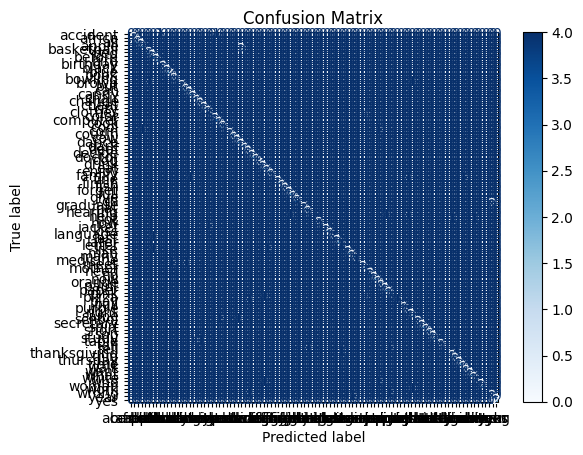

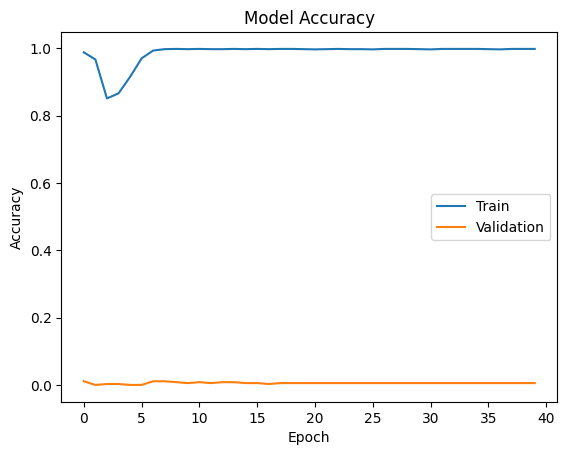

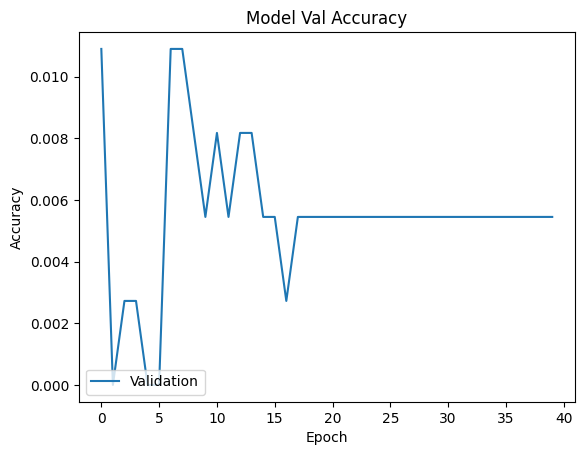

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot confusion matrix
def plot_conf_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()


# Plot accuracy graph
def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'], loc='right')
    plt.show()
    
def plot_valaccuracy(history):
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Val Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Validation'], loc='lower left')
    plt.show()
    
# Obtain predictions
y_pred = model.predict(X_test)

# Plot confusion matrix
plot_conf_matrix(y_test, np.argmax(y_pred, axis=1), classes=label_encoder.classes_)


# Plot accuracy graph
plot_accuracy(history)
plot_valaccuracy(history)

In [17]:
# Save the trained model
model.save('sign_lang_rec_model.h5')

In [21]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input

# Define the function to preprocess a single video
def preprocess_video(video_path, target_size=(224, 224), max_frames=50):
    frames = []
    # Load video using OpenCV
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        # Resize frame to target size and preprocess as needed
        frame = cv2.resize(frame, target_size)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert to RGB
        frames.append(frame)
        frame_count += 1
        if frame_count == max_frames:
            break
    cap.release()
    # Pad or truncate frames to ensure fixed length
    if len(frames) < max_frames:
        frames.extend([frames[-1]] * (max_frames - len(frames)))
    else:
        frames = frames[:max_frames]
    # Stack frames into a single video tensor
    video_tensor = np.stack(frames)
    return video_tensor

# Define the function to extract features from video frames using ResNet50
def extract_features(video_frames, base_model):
    # Preprocess input frames for ResNet50 model
    frames_preprocessed = preprocess_input(video_frames)
    # Extract features using ResNet50
    features = base_model.predict(frames_preprocessed)
    # Pool features across frames (e.g., average pooling)
    pooled_features = tf.reduce_mean(features, axis=(1, 2))  # Average pooling over spatial dimensions
    return pooled_features

# Load the saved model
saved_model_path = '/kaggle/working/sign_lang_rec_model.h5'
model = load_model(saved_model_path)

# Load the pre-trained ResNet50 model (excluding the top classification layer)
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define the path to your test video
test_video_path = '/kaggle/input/signproject-ds/dataset/dataset/decide/15036.mp4'

# Preprocess the test video
test_video = preprocess_video(test_video_path)

# Extract features from the test video
test_features = extract_features(test_video, base_model)

# Reshape the features to match the input shape expected by the model
test_features = np.expand_dims(test_features, axis=0)

# Perform inference using the model
predictions = model.predict(test_features)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Define a dictionary mapping class indices to words
class_index_to_word = {
    0: 'accident', 1: 'africa', 2: 'all', 3: 'apple', 4: 'basketball', 5: 'bed', 6: 'before', 7: 'bird', 8: 'birthday', 
    9: 'black', 10: 'blue', 11: 'book', 12: 'bowling', 13: 'brown', 14: 'but', 15: 'can', 16: 'candy', 17: 'chair', 
    18: 'change', 19: 'cheat', 20: 'city', 21: 'clothes', 22: 'color', 23: 'computer', 24: 'cook', 25: 'cool', 
    26: 'corn', 27: 'cousin', 28: 'cow', 29: 'dance', 30: 'dark', 31: 'deaf', 32: 'decide', 33: 'doctor', 34: 'dog', 
    35: 'drink', 36: 'eat', 37: 'enjoy', 38: 'family', 39: 'fine', 40: 'finish', 41: 'fish', 42: 'forget', 43: 'full', 
    44: 'give', 45: 'go', 46: 'graduate', 47: 'hat', 48: 'hearing', 49: 'help', 50: 'hot', 51: 'how', 52: 'jacket', 
    53: 'kiss', 54: 'language', 55: 'last', 56: 'later', 57: 'letter', 58: 'like', 59: 'man', 60: 'many', 61: 'medicine', 
    62: 'meet', 63: 'mother', 64: 'need', 65: 'no', 66: 'now', 67: 'orange', 68: 'paint', 69: 'paper', 70: 'pink', 
    71: 'pizza', 72: 'play', 73: 'pull', 74: 'purple', 75: 'right', 76: 'same', 77: 'school', 78: 'secretary', 
    79: 'shirt', 80: 'short', 81: 'son', 82: 'study', 83: 'table', 84: 'tall', 85: 'tell', 86: 'thanksgiving', 
    87: 'thin', 88: 'thursday', 89: 'time', 90: 'walk', 91: 'want', 92: 'what', 93: 'white', 94: 'who', 
    95: 'woman', 96: 'work', 97: 'wrong', 98: 'year', 99: 'yes'
}

# Get the predicted word
predicted_word = class_index_to_word.get(predicted_class_index, 'Unknown')

print("Predicted word:", predicted_word)


2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predicted word: decide


In [33]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.15.0
Keras version: 3.0.5
